# Sheet 10
## Task 1
Let $T \in \mathbb{N}$ and $z_t \in \mathbb{R}$ a RNN defined for the times $t = \{0,...,T\}$ as $$z_{t} = \phi (u * z_{t-1} + v * x_{t-1})$$ with an observation model $$y_{t} = w * z_{t}$$
For training we need a loss function, in this case MSE
\begin{align}
    \mathcal{L}(u,v,w) & = \Sigma_{t=1}^{T}(x_t - y_t)^2 \\
    & = \Sigma_{t=1}^{T}(y_t - x_t)^2
\end{align}<br>
For Backpropagation through time we view a time series generated by the RNN as a deep feed forward NN and use regular backpropagation. This means that we have to calculate the gradients of $\mathcal{L}$ with respect to the parameters of the model: $$\nabla_{u} \mathcal{L}, \nabla_{v} \mathcal{L}, \nabla_{w} \mathcal{L}$$

To make the formula at least a bit more readable we write for the derivate of the activation function $d\Phi(u * z_t + v * x_t) := d\Phi_t$

The gradiants can now be calculated:
\begin{align}
    \bullet\ \nabla_u \mathcal{L} & = \nabla_u \Sigma_{t=1}^{T} (y_t - x_t)^2 \\
    & = \Sigma_{t=1}^{T} \nabla_u (y_t - x_t)^2 \\
    & = \Sigma_{t=1}^{T} 2 * (y_t - x_t) * \nabla_u (y_t - x_t) \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * \nabla_u (w * z_t - x_t) \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * \nabla_u (w * \Phi(u * z_{t-1} + v * x_{t-1}) - x_t) \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * \nabla_u \Phi(u * z_{t-1} + v * x_{t-1}) \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi(u * z_{t-1} + v * x_{t-1}) * \nabla_u (u * z_{t-1} + v * x_{t-1}) \\ 
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} * (z_{t-1} + u * \nabla_u z_{t-1}) \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} * (z_{t-1} + u * d\Phi_{t-2} * (z_{t-2} + u * \nabla_u z_{t-2})) \\
    & ... \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} * (z_{t-1} + u * d\Phi_{t-2} * (z_{t-2} + u * d\Phi_{t-3} * (...(z_{1} + u * \nabla_u z_{1})...))) \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} * (z_{t-1} + u * d\Phi_{t-2} * (z_{t-2} + u * d\Phi_{t-3} * (...(z_{1} + u * d\Phi_0 * z_0)...))) \\
    \\
    \bullet\ \nabla_v \mathcal{L} & = \nabla_v \Sigma_{t=1}^{T} (y_t - x_t)^2 \\
    & = \Sigma_{t=1}^{T} \nabla_v (y_t - x_t)^2 \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} * \nabla_v (u * z_{t-1} + v * x_{t-1}) \\ 
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} (x_{t-1} + u * \nabla_v z_{t-1}) \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} (x_{t-1} + u * d\Phi_{t-2} (x_{t-2} + u * \nabla_v z_{t-2})) \\
    & ... \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} (x_{t-1} + u * d\Phi_{t-2} (x_{t-2} + u * d\Phi_{t-3}(...(x_1 + u * \nabla_v z_1)...))) \\
    & = 2 * \Sigma_{t=1}^{T} (y_t - x_t) * w * d\Phi_{t-1} (x_{t-1} + u * d\Phi_{t-2} (x_{t-2} + u * d\Phi_{t-3}(...(x_1 + u * d\Phi_0 * x_0)...))) \\
    \\
    \bullet\ \nabla_w \mathcal{L} & = \nabla_w \Sigma_{t=1}^{T} (x_t - y_t)^2 \\
    & = \Sigma_{t=1}^{T} \nabla_w (x_t - y_t)^2 \\
    & = \Sigma_{t=1}^{T} 2 * (x_t - y_t) * \nabla_w (x_t - w * z_t) \\
    & = 2 * \Sigma_{t=1}^{T} (x_t - y_t) * w * z_t
\end{align}

I dont really understand how the second part of the excercise is supposed to work... <br>
In the lecture we were provided with several ways to mitigate the problem of exploding/vanishing gradients, but the only one that would be applicable for this RNN is the use of the RELu activation function... <br>
To ensure that the gradients dont explode in general would be really difficult, for example for w we have to show that the following limit exists:
$$\nabla_w \mathcal{L} = 2 * \lim_{T \to \infty} \Sigma_{t=1}^{T} (x_t - y_t) * w * z_t$$ 
The only simple criterion for series convergence that is applicable here is <br>
Ratio test: $\forall t \in [T]: |\frac{(x_{t+1} - y_{t+1}) * w * z_{t+1}}{(x_{t} - y_{t}) * w * z_{t}}| < 1 \implies \nabla_w \mathcal{L}\ converges$ <br>
This would mean: $|\frac{(x_{t+1} - y_{t+1}) * z_{t+1}}{(x_{t} - y_{t}) * z_{t}}| < 1$ which I cant simplify any further, and is not given for any RNN for all timesteps, as $z_t$ and $x_t - y_t$ can be any number... <br>
Ensuring this criterion would mean, that the error $x_t - y_t$ has to become infinitly small for large t or that the hidden state $z_t$ has to become infinitly small. Both are not really practical / possible... <br>
For the other gradients this problem becomes even more difficult.

## Task 2
In this task we want to experiment with some regularization methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as tc

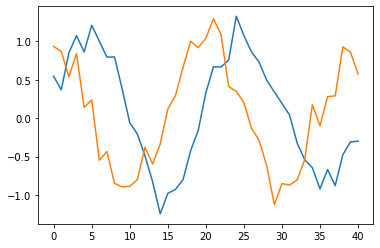

In [2]:
data = tc.load('noisy_sinus.pt')
plt.plot(data)

We will first define our RNN according to the last exercise sheet.

In [24]:
class latent_RNN(tc.nn.Module):
    def __init__(self, obs_dim, latent_dim):
        super().__init__()
        
        self.x_size = obs_dim
        self.z_size = latent_dim
        
        self.rnn = tc.nn.RNN(input_size = self.x_size, hidden_size = self.z_size)
        self.W = tc.nn.Linear(in_features = self.z_size, out_features = self.x_size)

    def forward(self, inputs, z_0):
        z_t, z_T = self.rnn(inputs, z_0)
        x_t = self.W(z_t)
        
        return x_t, z_T

For training we will use minibaching with the Adam optimizer.

In [7]:
def train_minibatch(model, loss_function, epochs = 500, learning_rate = 0.1, batch_number = 10, sequence_lenght = 8, verbose=False):
    optimizer = tc.optim.Adam(model.parameters(), lr=learning_rate)
    
    model.train()
    losses = np.zeros(epochs)
    for i in range(epochs):
        
        x = tc.zeros((sequence_lenght,batch_number,2))
        y = tc.zeros((sequence_lenght,batch_number,2))
        
        seq_start = np.random.permutation(data.shape[0]-sequence_lenght)
        for j in range(batch_number):
            x[:,j,:] = data[seq_start[j]:seq_start[j]+sequence_lenght,:]
            y[:,j,:] = data[seq_start[j]+1:seq_start[j]+sequence_lenght+1,:]
        
        h0 = tc.randn((1, batch_number, model.z_size))
        
        optimizer.zero_grad()               
        output, _ = model(x, h0)
        epoch_loss = loss_function(output, y)
        epoch_loss.backward()
        optimizer.step()
        
        losses[i] = epoch_loss.item()
        
        if (i % 100 == 0) and verbose:
            print("Epoch: {} loss {}".format(i, epoch_loss.item()))
     
    return losses

In [8]:
# A function to generate a time series with the model
def generate_TS(model, N):
    z = tc.zeros((1, model.z_size))
    x_t = tc.zeros((N, model.x_size))
    x_t[:1] = data[:1]
    
    model.eval()
    for t in range(1,N):
        x, z = model(x_t[t-1:t], z)
        x_t[t] = x[0]
    
    return x_t.detach().numpy()

# A function to plot the time series resulting from the model
def evaluate(model):
    x = generate_TS(model, 6 * data.shape[0])
    
    plt.figure(figsize = (8,5))
    plt.title('The behavior of the NN compared to the target data')

    plt.plot(data, label = ['true $x^0$', 'true $x^1$'])
    plt.scatter(np.arange(0, 50), x[:50,0], marker = 'x', label = 'predicted $x^0$')
    plt.scatter(np.arange(0, 50), x[:50,1], marker = 'x', label = 'predicted $x^1$')

    plt.xlabel('t')
    plt.legend()
    plt.show()
    
    plt.figure(figsize = (8,5))
    plt.title('The long term behavior of the NN')

    plt.plot(x)

    plt.xlabel('t')
    plt.show()
    
# A function to evaluate multiple models
def evaluate_(models, titles):
    fig, axs = plt.subplots(len(models), 1, figsize=(8, 5 * len(models)))
    
    for i in range(len(models)):
        x = generate_TS(models[i], 2 * data.shape[0])
        
        axs[i].plot(data, label = ['true $x^0$', 'true $x^1$'])
        axs[i].scatter(np.arange(0, 50), x[:50,0], marker = 'x', label = 'predicted $x^0$')
        axs[i].scatter(np.arange(0, 50), x[:50,1], marker = 'x', label = 'predicted $x^1$')
        
        axs[i].set_title(titles[i])
    axs[-1].legend()

As a benchmark we will use a model trained with regular MSE Loss and an obviously too big number of hidden units, such that it overfits the data.

In [9]:
hidden_size = 10
model = latent_RNN(data.shape[1], hidden_size)

loss = train_minibatch(model, tc.nn.MSELoss())

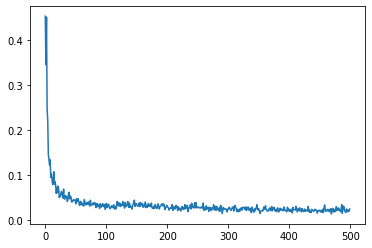

In [10]:
plt.plot(loss)

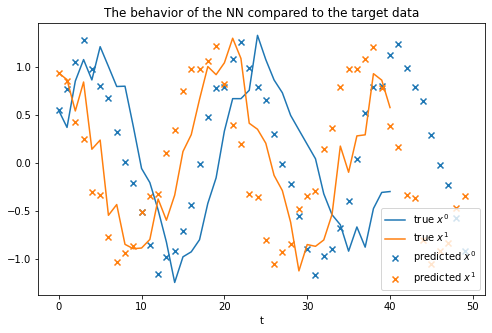

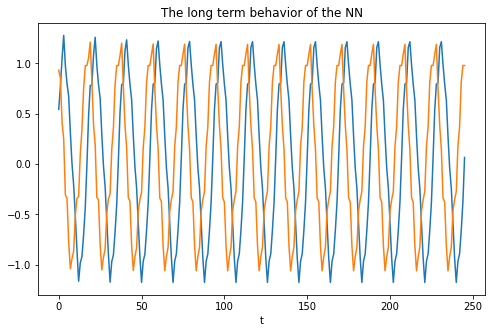

In [11]:
evaluate(model)

The resulting model clearly overfits the data, as it learns to include the noise in the oscillation.

## Task 2.1
To solve this problem we will try several regularization techniques. The first being $L_1$ loss.

In [12]:
MSE = tc.nn.MSELoss()

def L1(model, alpha):
    return lambda x, y: MSE(x, y) + alpha * sum(p.abs().sum() for p in model.parameters())

To test $L_1$ loss we train several models with different regularization strenghts $\alpha$ and compare the resulting models with the baseline model.

In [18]:
alpha = [1, 0.5, 0.1, 0.01, 0.001]

models = []
losses = []
for alpha_ in alpha:
    model = latent_RNN(data.shape[1], hidden_size)
    models.append(model)
    
    losses.append(train_minibatch(model, L1(model, alpha_), epochs = 2000))

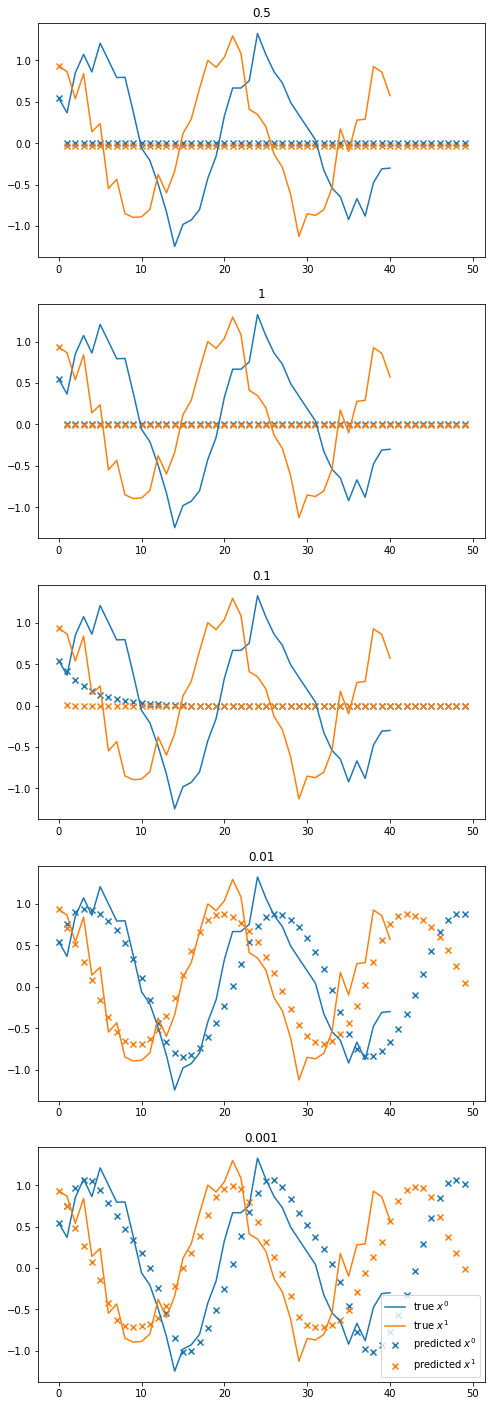

In [19]:
evaluate_(models, alpha)

We find, that the $L_1$ loss can decrease overfitting for the correct regularization strenghts. When the strenght is too high the model is not able to learn the correct dynamical behavior <br>
$L_1$ regularization works, because it effectivley forces the model to use as few of its hidden neurons as possible, decreasing the model size, which in turn makes overfitting more difficult.

## Task 2.2
The next regularization technique is $L_2$ regularization.

In [15]:
def L2(model, alpha):
    return lambda x, y: MSE(x, y) + alpha * sum(p.pow(2).sum() for p in model.parameters())

In [20]:
alpha = [1, 0.5, 0.1, 0.01, 0.001]

models = []
losses = []
for alpha_ in alpha:
    model = latent_RNN(data.shape[1], hidden_size)
    models.append(model)
    
    losses.append(train_minibatch(model, L2(model, alpha_), epochs = 2000))

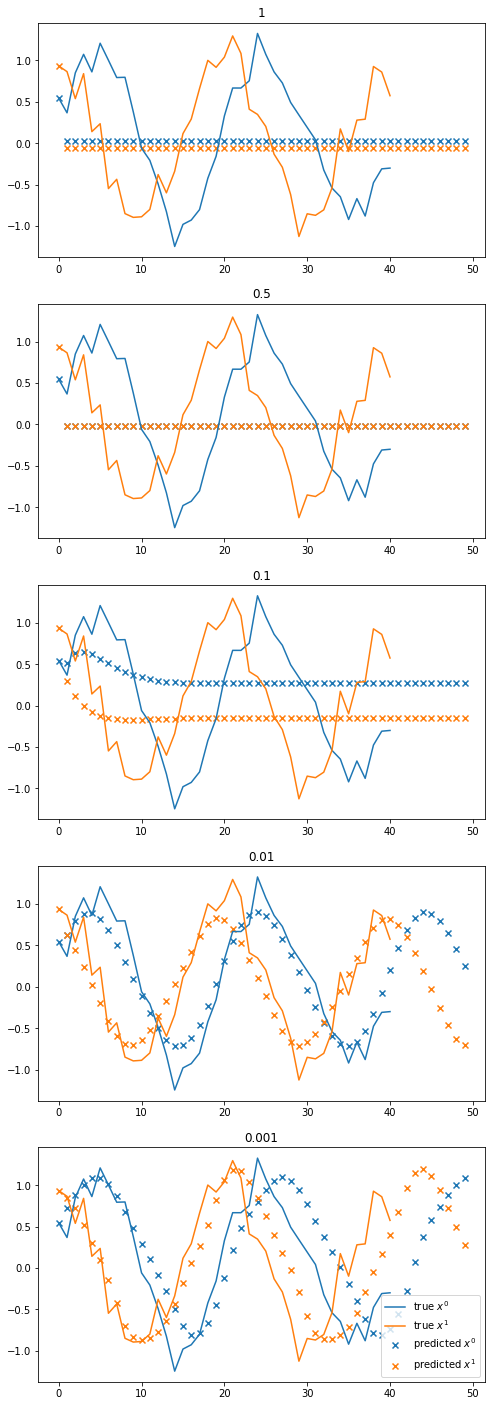

In [21]:
evaluate_(models, alpha)

$L_2$ regularization appears to be a valid solution to overfitting, given the right regularization strength. <br>
It works very similar to $L_1$ regularization by penalizing large parameters in the loss function, thus forcing the model to use as little parameters as possible.

## Task 2.3
Lastly we will use dropout during training to get a better model after training.

Unfortunatly the standard implementation of RNNs in pytorch does not use dropout layers after the last hidden layer. Since we only use one hidden layer, enabling dropout in our RNN effectively does nothing. <br>
To get a rough idea, we will instead insert a droupout layer after the observation model:

In [28]:
class latent_RNN_(tc.nn.Module):
    def __init__(self, obs_dim, latent_dim, dropout):
        super().__init__()
        
        self.x_size = obs_dim
        self.z_size = latent_dim
        
        self.rnn = tc.nn.RNN(input_size = self.x_size, hidden_size = self.z_size)
        self.W = tc.nn.Linear(in_features = self.z_size, out_features = self.x_size)
        self.dropout = tc.nn.Dropout(dropout)

    def forward(self, inputs, z_0):
        z_t, z_T = self.rnn(inputs, z_0)
        x_t = self.W(z_t)
        x_t = self.dropout(x_t)
        
        return x_t, z_T

We train this model several times with different dropout probabilities and compare them to the baseline model.

In [31]:
dropout = [0.01, 0.1, 0.3, 0.5, 0.7, 1]

alpha = [1, 0.5, 0.1, 0.01, 0.001]

models = []
losses = []
for dropout_ in dropout:
    model = latent_RNN_(data.shape[1], hidden_size, dropout_)
    models.append(model)
    
    losses.append(train_minibatch(model, MSE, epochs = 2000))

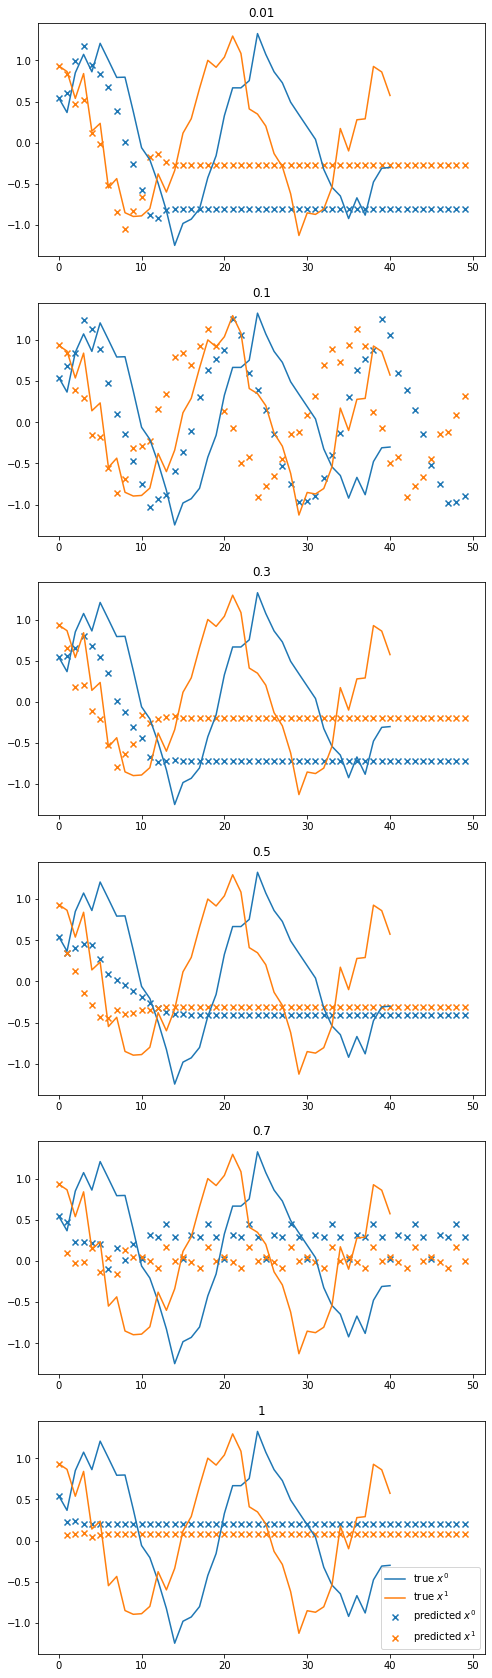

In [32]:
evaluate_(models, dropout)

We can see, that this model is hardly able to learn the desired dynamics. <br>
I dont really understand why this is the case, I think that dropout in the observation model should have the same effect as dropout in the RNN itself, as the effect of the dropout layer should backpropagate into the RNN... <br> <br>
Dropout layers can mitigate overfitting by forcing the model to distribute its computation across as many neurons as possible, to become dropout resistant. This resilience seems to combat overfitting <br> (In my imagination this is because the model basically has to fit itself into the many hidden states several times, thus effectively deviding the hidden state into several smaller RNNs that dont overfit as much)